In [126]:
import pandas as pd
from pandas import DataFrame
from pandas.plotting import radviz
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
#import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm, preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron

In [127]:
def read(file):
    return pd.read_csv(file)

#features.set_index(['Index'], inplace = True)
#features.drop(columns = ['Index'], inplace = True)

features = read('unique_best_features.csv')
features.head(5)

,n [count],H [mm],b [mm],d [mm],γ [N/mm3],Pmax [N],P0 [N]
0,3,90.0,19.4114,5.0,0.000016,9.080644,0.046939
1,3,90.0,12.9410,5.0,0.000016,8.758713,0.154249
2,6,90.0,19.4114,5.0,0.000016,11.753734,0.720029
3,6,90.0,12.9410,5.0,0.000016,10.797683,1.032218
4,F,90.0,19.4114,5.0,0.000016,14.095079,2.017568


In [128]:
def print_shape(data):
    print("The shape of our feature is " + str(data.shape))

print_shape(features)

The shape of our feature is (177, 7)


In [129]:
#summary statistics
features.describe()
features.columns.values

array(['n [count]', 'H [mm]', 'b [mm]', 'd [mm]', 'γ [N/mm3]', 'Pmax [N]',
       'P0 [N]'], dtype=object)

In [130]:
#pd.options.display.max_rows = 181
pd.options.display.max_columns = 30
#features.sort_values(by = "L [mm]", ascending = True, inplace = True)
#display(features)

In [131]:
#one hot encoding
pd.options.display.max_columns = 181
pd.options.display.max_rows = 181
#features = pd.get_dummies(features, columns = ['n [count]', 'Material'])
features = pd.get_dummies(features, columns = ['n [count]'])
#features = pd.get_dummies(features, columns = ['Material'])
#features.head(5)
#display(features)
#print_shape(features)

In [132]:
#target pmax
pmax = features['Pmax [N]']
#Remove labels from the features
features = features.drop('Pmax [N]', axis = 1)

features = StandardScaler().fit_transform(features)

#pca = PCA(n_components = 11)
#principalComponents = pca.fit_transform(features)
#features = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11'])
#display(features)
#print(pca.explained_variance_ratio_.cumsum())

#Covert to numpy arrays
#features = np.array(features)



#print(features)
print_shape(features)

The shape of our feature is (177, 11)


In [133]:
#split the data into training set and testing set 
train_features, test_features, train_labels, test_labels = train_test_split(features, pmax, test_size = 0.25, random_state = 42)

In [134]:
rf = RandomForestRegressor(n_estimators = 281, random_state = 187)
rf.fit(train_features, train_labels)
#Make Predictions
#Use the forest's predict method on the test data 
predictions = rf.predict(test_features)

#Calculate the absolute errors
errors = abs(predictions - test_labels)

#print out the mean absolute error
print('Mean Absolute Error:', round(np.mean(errors), 2), 'newton.')
# Calculate mean absolute percentage error
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 3.17 newton.
Accuracy: 86.31 %.


In [135]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
cv_r2_scores_rf = cross_val_score(rf, features, pmax, cv = 5)
print(cv_r2_scores_rf)
print("Mean 10-fold R squared :{}". format(np.mean(cv_r2_scores_rf)))

[0.90789051 0.89347768 0.68629347 0.78959391 0.80871435]
Mean 10-fold R squared :0.8171939817072079


In [136]:
number_of_splits = []
mean_score = []

In [137]:
for j in range(2, 11):
    kf = KFold(n_splits = j, shuffle = True)
    rf_reg = RandomForestRegressor()
    scores = []
    for i in range(5):
        result = next(kf.split(features), None)
        x_train = pd.DataFrame(features).iloc[result[0]]
        x_test = pd.DataFrame(features).iloc[result[1]]
        y_train = pmax.iloc[result[0]]
        y_test = pmax.iloc[result[1]]
        model = rf_reg.fit(x_train,y_train)
        predictions = rf_reg.predict(x_test)
        scores.append(model.score(x_test,y_test))
    print('Scores from each Iteration: ', scores)
    number_of_splits.append(j)
    print('Average K-Fold Score :' , np.mean(scores))
    mean_score.append(np.mean(scores))

Scores from each Iteration:  [0.8403229142934318, 0.9186618424992383, 0.8810444091707715, 0.7758522585670311, 0.8809646305503906]
Average K-Fold Score : 0.8593692110161726
Scores from each Iteration:  [0.920290199676121, 0.8724894342387038, 0.9601458169773374, 0.8614232771386352, 0.8892912531251683]
Average K-Fold Score : 0.900727996231193
Scores from each Iteration:  [0.9452141785951228, 0.9152250537449285, 0.9155383232727017, 0.9136180952596473, 0.9271781814440578]
Average K-Fold Score : 0.9233547664632915


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 

Scores from each Iteration:  [0.8472630771576152, 0.8786047409886613, 0.8158876284780194, 0.9341257678981221, 0.9059421871130819]
Average K-Fold Score : 0.8763646803270999
Scores from each Iteration:  [0.9090169724231031, 0.9086657555320264, 0.8835195879033783, 0.8363703164438197, 0.9000523894575809]
Average K-Fold Score : 0.8875250043519817
Scores from each Iteration:  [0.9547311200347443, 0.9027724768821193, 0.8189942281238822, 0.9612918730778311, 0.8484887913176842]
Average K-Fold Score : 0.8972556978872521
Scores from each Iteration:  [0.9228937425421718, 0.9436901448331748, 0.8910312378213722, 0.9507245297491169, 0.8782740575611493]
Average K-Fold Score : 0.917322742501397


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 

Scores from each Iteration:  [0.9331779910893617, 0.9484854718594363, 0.9354655324814846, 0.9008143896376519, 0.907948781672577]
Average K-Fold Score : 0.9251784333481023
Scores from each Iteration:  [0.9382025128318967, 0.8230182278231376, 0.9829826792848074, 0.827777673706334, 0.9180308075117942]
Average K-Fold Score : 0.8980023802315941


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [138]:
print(number_of_splits)
print(mean_score)

[2, 3, 4, 5, 6, 7, 8, 9, 10]
[0.8593692110161726, 0.900727996231193, 0.9233547664632915, 0.8763646803270999, 0.8875250043519817, 0.8972556978872521, 0.917322742501397, 0.9251784333481023, 0.8980023802315941]


In [139]:
k_fold = {'number of splits': number_of_splits, 'mean classification score': mean_score}
df = DataFrame(k_fold, columns= ['number of splits', 'mean classification score'])
print(df)
print(np.mean(mean_score))

   number of splits  mean classification score
0                 2                   0.859369
1                 3                   0.900728
2                 4                   0.923355
3                 5                   0.876365
4                 6                   0.887525
5                 7                   0.897256
6                 8                   0.917323
7                 9                   0.925178
8                10                   0.898002
0.898344545817565


In [140]:
export_csv = df.to_csv (r'/Users/zhenjiang/Desktop/cx4240/Project/export_dataframe.csv', index = None, header=True)

In [147]:
import seaborn as sns

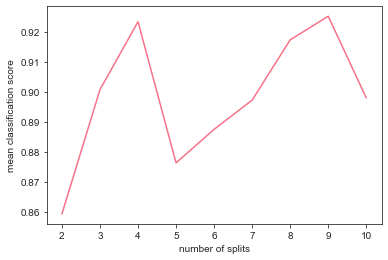

In [148]:

df = pd.read_csv("export_dataframe.csv")
sns.set_palette("husl")
sns.set_style('white')
sns.set_style('ticks')
ax = sns.lineplot(x="number of splits", y= 'mean classification score', data= df )
fig = ax.get_figure()
fig.savefig("kfold.png")